# Анализ датасета о продуктах

Ход работы:
1. Импортируйте библиотеки, которые были описаны на лекции
2. Импортируйте датасет foodmart.products.tsv, предварительно скачав его
3. Проведите анализ данных, используя лекционный файл 6 EDA в качестве примера.
 - Прим. *Для отображения используйте библиотеку seaborn!*
 - Отобразите 5 первых элементов таблицы и пять последних
 - Отобразите статистику по датасету, используя функции .info(), .describe()
 - Изучите таблицу на наличие дублей, удалите их, если обнаружите
 - Визуализируйте данные (обязательно scatterplot, hist, countplot, pairplot + что-нибудь интересное из библиотеки на ваш вкус)
 - Постройте матрицу корреляции признаков
 - Изучите пропуски, обработайте их удалением или заполнением (средним значением, модой и тд)
 - Поищите выбросы в данных. Их не удаляйте, добавьте новый столбец-маркер "Outlier" и отметьте в нем True для выбросов и False - в противоположном случае
 - Преобразуйте все данные к их истинным типам. Например, low_fat - к типу bool, подумайте, что нужно сделать. Числовые типы - соответственно к int или float
 - Приведите все столбцы строкового типа к нижнему регистру
 - brand_name дублируется в product_name, очистите product_name от дублирования

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("foodmart.products.tsv", sep="\t")

df.head() # выводим первые 5 строк таблицы

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [24]:
df[-5:] # выводим последние 5 строк таблицы

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
1555,53,1556,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.5
1556,33,1557,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.3
1557,53,1558,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.4
1558,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8
1559,31,1560,CDR,CDR Grape Jelly,54896665215,1.60,12.50,10.50,False,True,1,9,5.44,3.24,18.3


In [25]:
df.info() # смотрим на опмисание столбцов и их типов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_class_id    1560 non-null   int64  
 1   product_id          1560 non-null   int64  
 2   brand_name          1560 non-null   object 
 3   product_name        1560 non-null   object 
 4   SKU                 1560 non-null   int64  
 5   SRP                 1560 non-null   float64
 6   gross_weight        1560 non-null   float64
 7   net_weight          1560 non-null   float64
 8   recyclable_package  1560 non-null   bool   
 9   low_fat             1560 non-null   bool   
 10  units_per_case      1560 non-null   int64  
 11  cases_per_pallet    1560 non-null   int64  
 12  shelf_width         1560 non-null   float64
 13  shelf_height        1560 non-null   float64
 14  shelf_depth         1560 non-null   float64
dtypes: bool(2), float64(6), int64(5), object(2)
memory usag

In [26]:
df.describe() # выводит общие значения для каждого столбца

,product_class_id,product_id,SKU,SRP,gross_weight,net_weight,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
count,1560.000000,1560.000000,1.560000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000
mean,54.403205,780.500000,5.562930e+10,2.117282,13.804821,11.791308,18.908333,9.475641,12.900692,12.915103,12.933750
std,30.872364,450.477524,2.580380e+10,0.932779,4.631014,4.693747,10.254237,2.638963,5.763655,5.844180,5.603036
min,1.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,1.000000,5.000000,3.010000,3.000000,3.000000
25%,30.000000,390.750000,3.345056e+10,1.417500,9.657500,7.705000,10.000000,7.000000,7.860000,7.867500,8.300000
50%,57.500000,780.500000,5.629308e+10,2.130000,13.600000,11.600000,19.000000,9.000000,12.900000,12.700000,12.850000
75%,79.000000,1170.250000,7.798317e+10,2.792500,17.725000,16.000000,28.000000,12.000000,17.625000,18.200000,17.600000
max,110.000000,1560.000000,9.998368e+10,3.980000,21.900000,20.800000,36.000000,14.000000,22.900000,22.900000,22.900000


In [27]:
df.isna().any().any() # смотрим на наличие пропусков

False

In [28]:
df[df.duplicated()].shape # проверяем на наличие дубликатов

(0, 15)

- Визуализируйте данные (обязательно scatterplot, hist, countplot, pairplot + что-нибудь интересное из библиотеки на ваш вкус)

<Axes: xlabel='gross_weight', ylabel='SRP'>

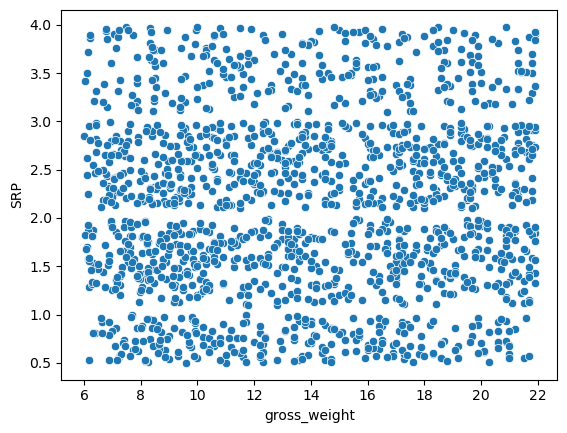

In [29]:
sns.scatterplot(x='gross_weight', y='SRP',  data=df)

<Axes: xlabel='SRP', ylabel='Count'>

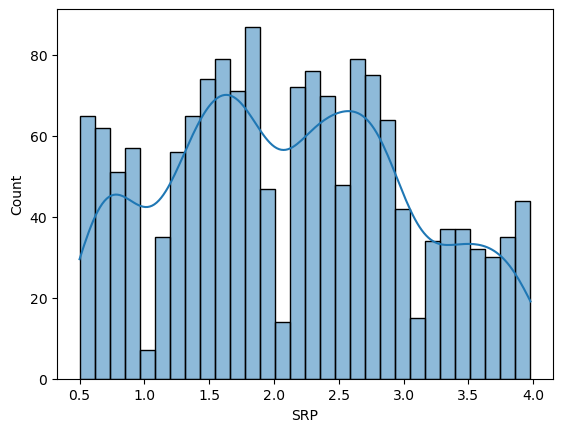

In [42]:
sns.histplot(df['SRP'], bins=30, kde=True)

<Axes: xlabel='product_class_id', ylabel='gross_weight'>

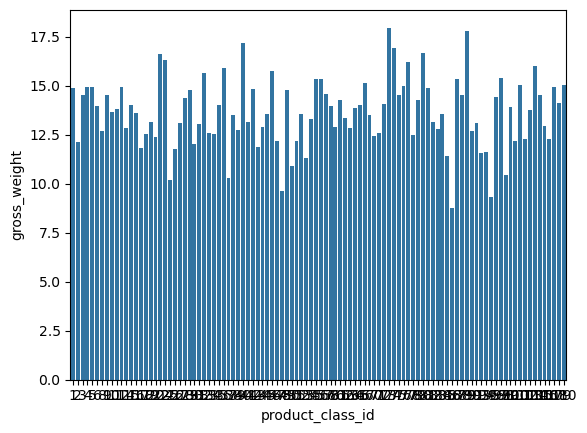

In [31]:
agg_df = df.groupby("product_class_id")["gross_weight"].mean().reset_index()

sns.barplot(x="product_class_id", y="gross_weight", data=agg_df)

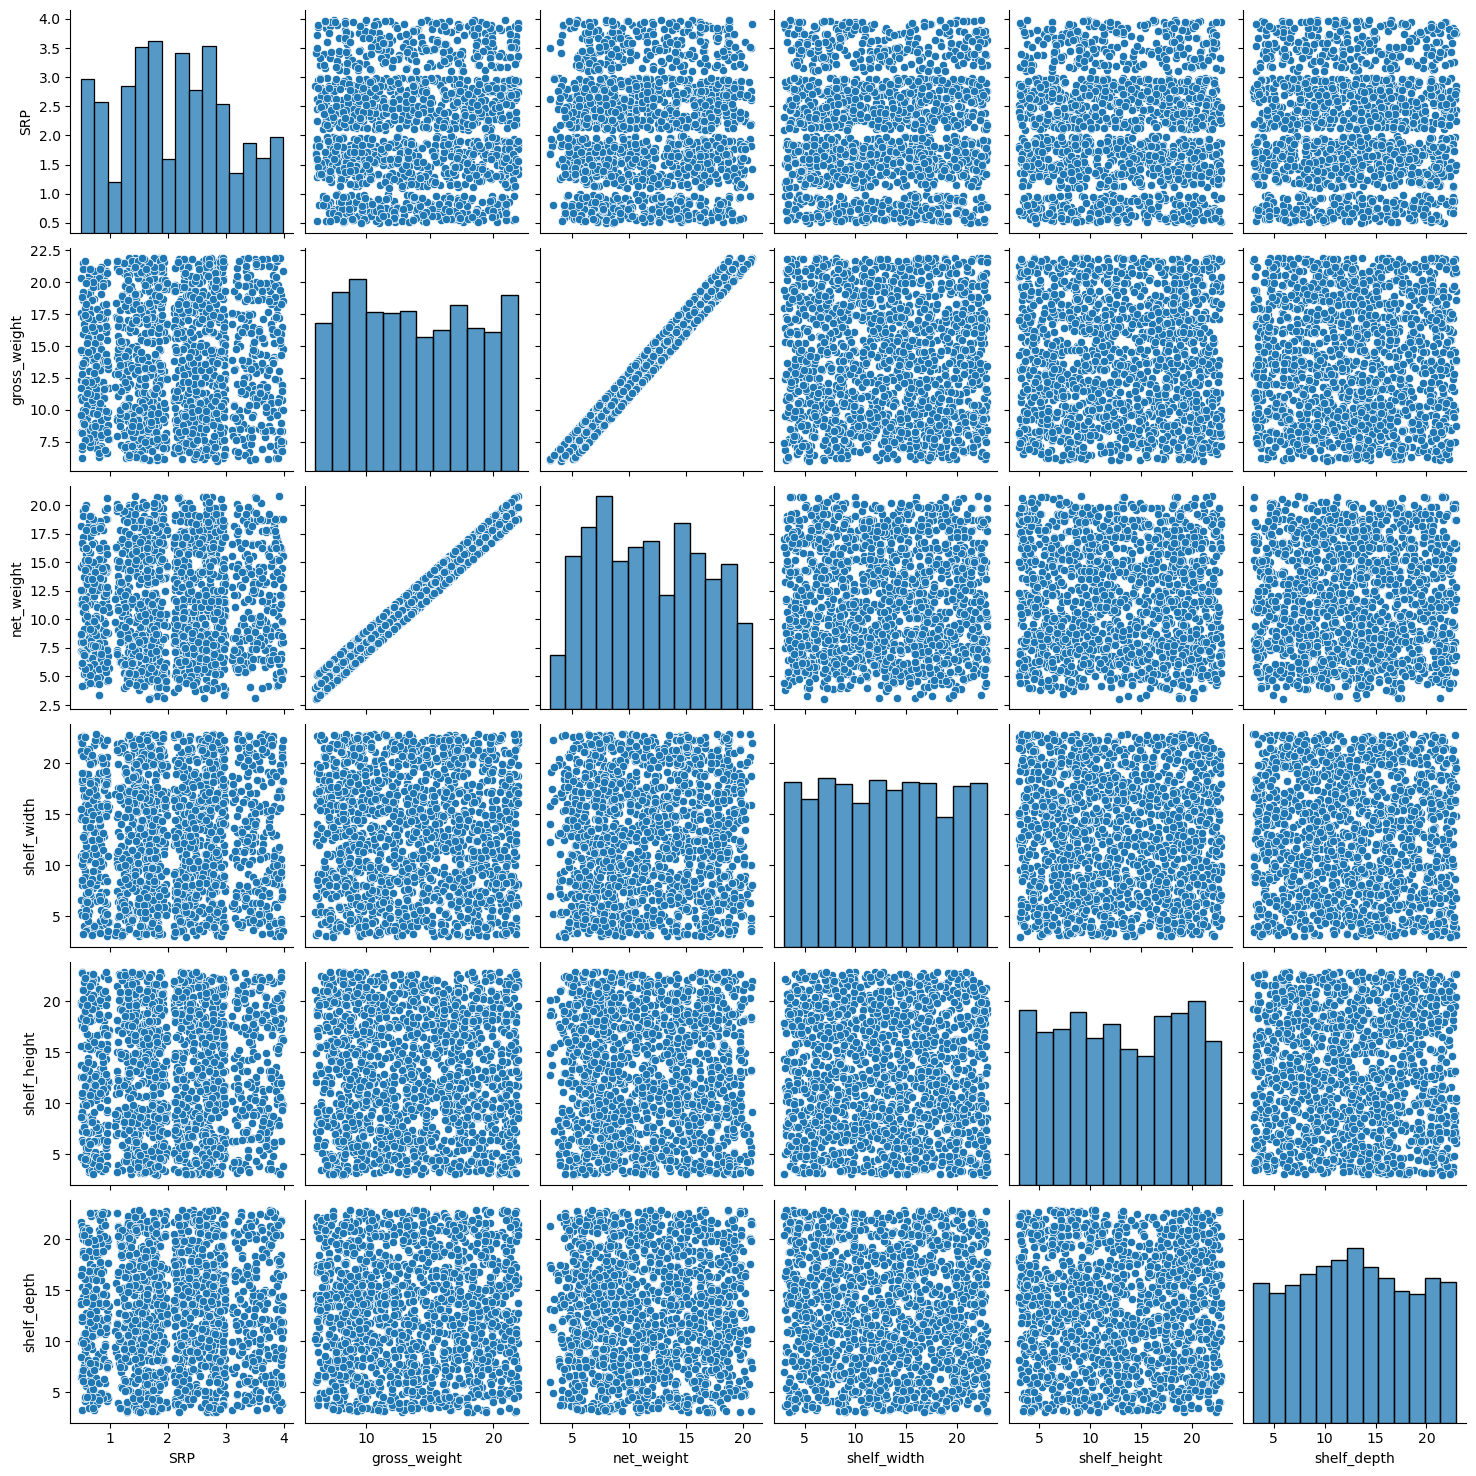

In [32]:
sns.pairplot(df, vars=['SRP', 'gross_weight', 'net_weight', 'shelf_width', 'shelf_height', 'shelf_depth'])

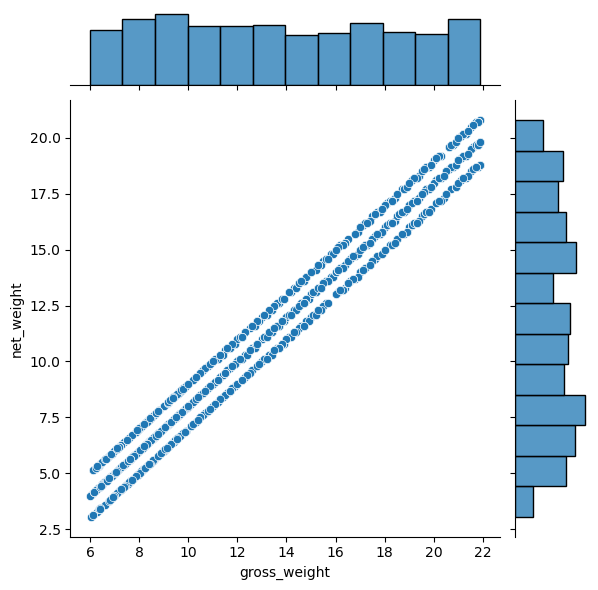

In [33]:
sns.jointplot(x='gross_weight', y='net_weight', data=df, kind='scatter')

<Axes: >

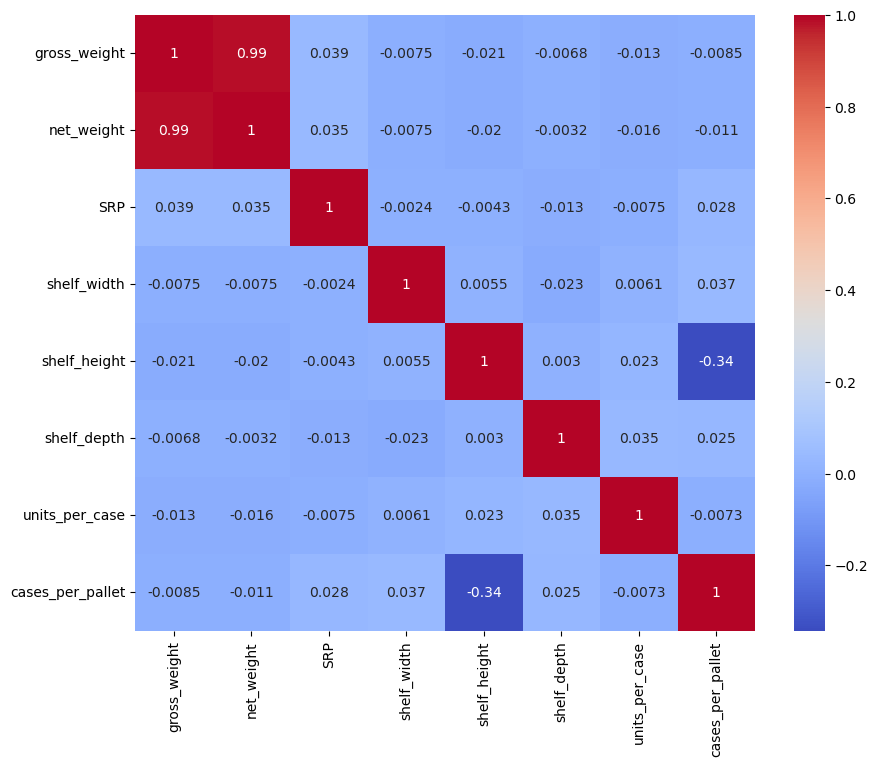

In [34]:
# построение корреляционной матрицы

# задание столбцов для нахождения корреляции
corr_matrix = df[['gross_weight', 'net_weight', 'SRP', 'shelf_width', 'shelf_height', 'shelf_depth', 'units_per_case', 'cases_per_pallet']].corr() 

# установка размера графика
plt.figure(figsize=(10, 8))

# создание  матрицы корреляции
sns.heatmap(corr_matrix,annot = True, cmap = "coolwarm")

In [35]:
# работаем с выбросмаи данных

# находим межквартильный размах
Q1 = df["net_weight"].quantile(0.25)
Q3 = df["net_weight"].quantile(0.75)
IQR = df["net_weight"].quantile(0.75) - df["net_weight"].quantile(0.25)
print(Q1, Q3, IQR)

# ищем выбросы
df[(df["net_weight"] < (Q1 - 1.5 * IQR)) | (df["net_weight"] > (Q3 + 1.5 * IQR))]

7.705 16.0 8.295


,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth


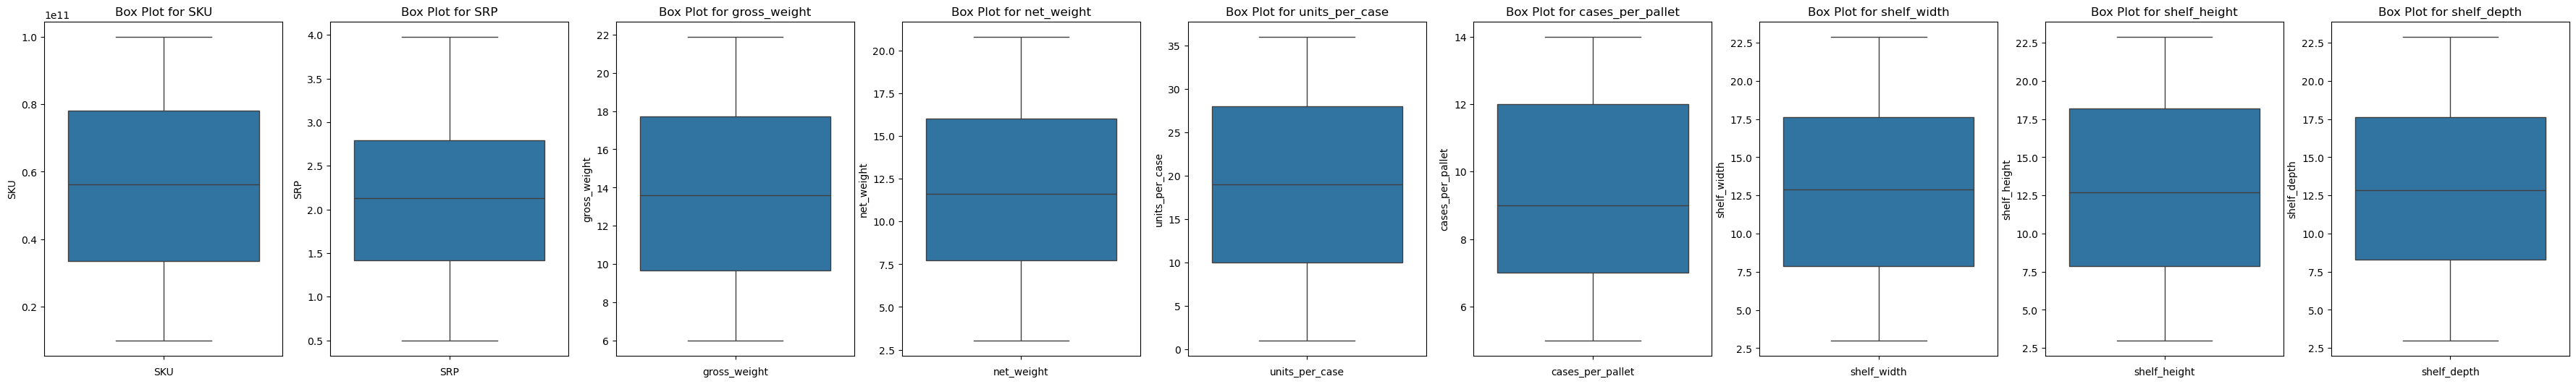

In [36]:
# смотрим присутствуют ли выбросы вообще

# делаем новую таблицу без ненужных данных
disp = df.drop(["product_class_id", "product_id", "brand_name", "product_name", "recyclable_package", "low_fat"], axis=1)
num_columns = len(disp.columns)
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 6))

# строим график для каждого столбца
for i, column in enumerate(disp.columns):
    sns.boxplot(y=disp[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel(column)



# как видно по графикам нет ни одного выброса 

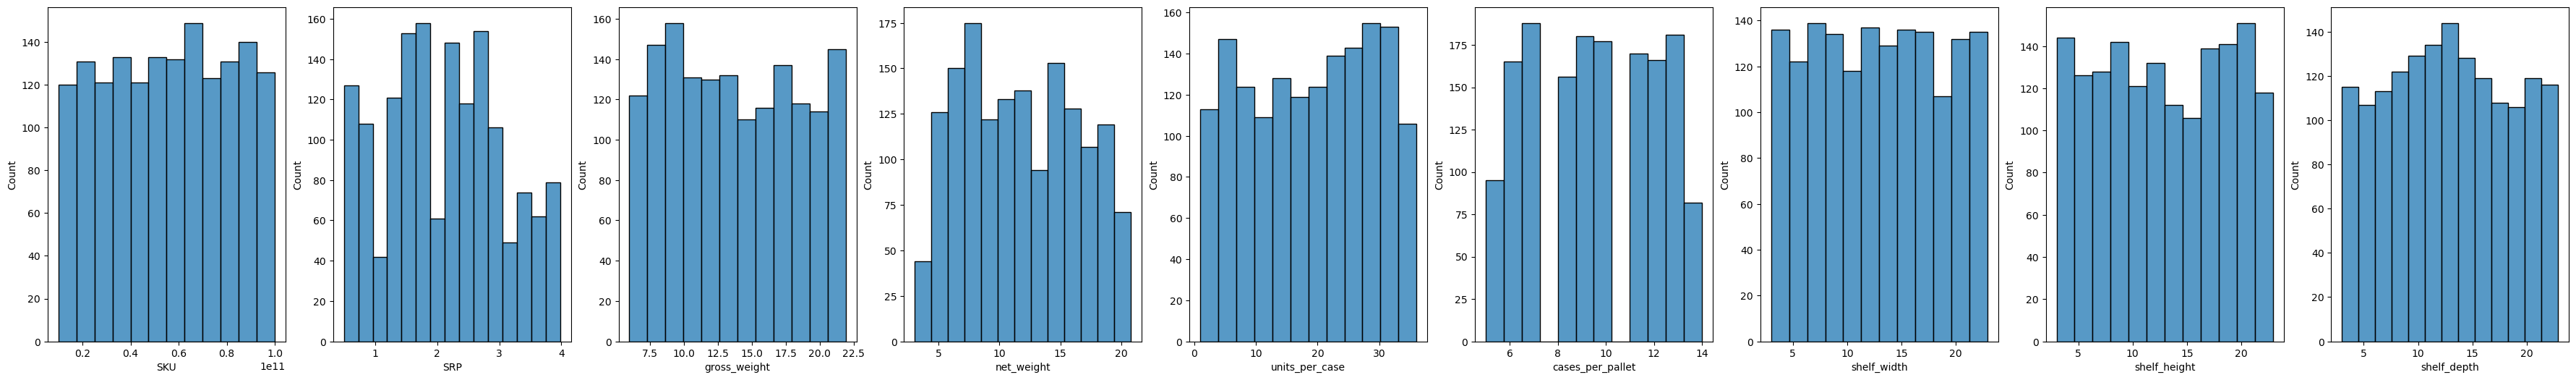

In [37]:
# делаем то же самое но с гистограммой
fig, axes = plt.subplots(1, num_columns, figsize=(5 * num_columns, 6))

# Строим гистограмму для двойной проверки
for i, column in enumerate(disp.columns):
    sns.histplot(disp[column], ax=axes[i])

In [38]:
# добавляем столбец Outlier, который показывает наличие выбросов

# Функция для определения выбросов
def OutlierLine(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

outliers_df = disp.apply(OutlierLine)

# Добавление столбца 
df["Outlier"] = outliers_df.any(axis=1)

df.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,Outlier
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40,False
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60,False
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77,False
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93,False
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20,False


In [39]:
# проверяем выбросы в 3 раз

df["Outlier"].any()

False

In [40]:
# приведем все данные в таблице к нижнему регистру

df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

df.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,Outlier
0,30,1,washington,washington berry juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40,False
1,52,2,washington,washington mango drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60,False
2,52,3,washington,washington strawberry drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77,False
3,19,4,washington,washington cream soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93,False
4,19,5,washington,washington diet soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20,False


In [41]:
# избавляемся от дублирования в product_name

df['product_name'] = df.apply(lambda row: row['product_name'].replace(row['brand_name'], '').strip(), axis=1)

df.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,Outlier
0,30,1,washington,berry juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40,False
1,52,2,washington,mango drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60,False
2,52,3,washington,strawberry drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77,False
3,19,4,washington,cream soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93,False
4,19,5,washington,diet soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20,False
